# FinancialInstrument Class

In [1]:
import pandas as pd
df = pd.DataFrame()

In [4]:
datetime_index = pd.date_range(start='2021-01-01', end='2022-12-31')

In [6]:
timestamp = datetime_index[0]

In [18]:
timestamp.strftime('%Y-%m-%d')

'2021-01-01'

In [126]:
pd.to_datetime(['2022-05'])
may_2022 = pd.date_range(start='2022-05-01', end='2022-05-31')
may_2021 = pd.date_range(start='2021-05-01', end='2021-05-31')
pd.to_datetime([*may_2022, *may_2021])

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
      

In [130]:
may_2022

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', freq='D')

In [131]:
[*may_2022]

[Timestamp('2022-05-01 00:00:00', freq='D'),
 Timestamp('2022-05-02 00:00:00', freq='D'),
 Timestamp('2022-05-03 00:00:00', freq='D'),
 Timestamp('2022-05-04 00:00:00', freq='D'),
 Timestamp('2022-05-05 00:00:00', freq='D'),
 Timestamp('2022-05-06 00:00:00', freq='D'),
 Timestamp('2022-05-07 00:00:00', freq='D'),
 Timestamp('2022-05-08 00:00:00', freq='D'),
 Timestamp('2022-05-09 00:00:00', freq='D'),
 Timestamp('2022-05-10 00:00:00', freq='D'),
 Timestamp('2022-05-11 00:00:00', freq='D'),
 Timestamp('2022-05-12 00:00:00', freq='D'),
 Timestamp('2022-05-13 00:00:00', freq='D'),
 Timestamp('2022-05-14 00:00:00', freq='D'),
 Timestamp('2022-05-15 00:00:00', freq='D'),
 Timestamp('2022-05-16 00:00:00', freq='D'),
 Timestamp('2022-05-17 00:00:00', freq='D'),
 Timestamp('2022-05-18 00:00:00', freq='D'),
 Timestamp('2022-05-19 00:00:00', freq='D'),
 Timestamp('2022-05-20 00:00:00', freq='D'),
 Timestamp('2022-05-21 00:00:00', freq='D'),
 Timestamp('2022-05-22 00:00:00', freq='D'),
 Timestamp

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas import DataFrame, Series
from typing import Union, Optional, Tuple
from enum import Enum


class FinancialInstrumentData(DataFrame):
    price: Series
    log_returns: Series

class Frequency(Enum):
    business_day = 'B'
    business_month ='BM'
    day = 'D'
    week = 'W'
    # TODO: finish

class FinancialInstrumentBase:
    data:FinancialInstrumentData
    ticker: str
    start: Union[str, None]
    end: Union[str, None]

    def __init__(self, ticker:str, start:Optional[str]=None, end:Optional[str]=None):
        self._ticker = ticker
        self._start = start
        self._end = end
        self.figsize = (12, 8)
        self._load()
        self._config()
    
    def __repr__(self):
        return f'{self.__class__.__name__}(ticker={self.ticker}, start={self.start}, end={self.end})'

    def _load_data(self):
        """Loads data from yfinance for the current ticker, start, and end date"""
        data:DataFrame = yf.download(self.ticker, start=self.start, end=self.end).Close.to_frame()
        data.rename(columns={"Close": "price"}, inplace=True)
        self.data = data

    def _add_log_returns(self):
        changes = self.data / self.data.shift(1)
        self.data["log_returns"] = np.log(changes)

    def _load(self):
        self._load_data()
        self._add_log_returns()

    def _config(self):
         plt.style.use('seaborn')

    @property
    def ticker(self):
        return self._ticker
    
    @ticker.setter
    def ticker(self, value):
         self._ticker = value
         self._load()
         
    @property
    def start(self):
        return self._start

    @property
    def end(self):
        return self._end

class PlotMixin:
    data: FinancialInstrumentData
    ticker: str
    figsize: Tuple[int, int]
    def _get_bins(self):
        return int(np.sqrt(len(self.data)))

    def plot_prices(self, **kwargs):
        self.data.price.plot(figsize=self.figsize, **kwargs)
        plt.title(f'Price: {self.ticker}', fontsize=15)

    def plot_returns(self, hist=False, **kwargs):
        title = f'Log Returns: {self.ticker}'
        if hist:
            bins = self._get_bins()
            self.data.log_returns.hist(figsize=self.figsize, bins=bins)
            plt.title(title, fontsize=15)
            plt.axvline(x=0, c="orange", ls="--")
            plt.show()
        else:
            self.data.log_returns.plot(figsize=self.figsize, **kwargs)
            plt.title(title, fontsize=15)
            plt.axhline(y=0, c="orange", ls="--")

class FinancialInstrument(FinancialInstrumentBase, PlotMixin):
    
    def _get_resampled_returns(self, freq):
        ''' Returns returns resampled by the given frequency'''
        resampled_price = self.data.loc[:, 'price'].resample(freq).last()
        yesterdays_price = resampled_price.shift(1)
        resampled_returns = np.log(resampled_price / yesterdays_price)
        return resampled_returns

    def mean_return(self, freq=None):
        '''Returns the mean log return'''
        if freq is None:
            return self.data.loc[:,'log_returns'].mean()
        else:
            return self._get_resampled_returns(freq).mean()
    
    def std_returns(self, freq=None):
        if freq is None:
            return self.data.loc[:, 'log_returns'].std()
        else:
            return self._get_resampled_returns(freq).std()

    def return_over_risk(self):
        '''Returns annualized return over risk (std)'''
        log_returns = self.data["log_returns"]
        mean_annual_return = log_returns.mean() * 252
        annualized_std = log_returns.std() * np.sqrt(252)
        return round(mean_annual_return / annualized_std, 3)
        

In [142]:
stock = FinancialInstrument("GOOG", start="2012-01-01")

[*********************100%***********************]  1 of 1 completed


In [143]:
stock.perf()

0.717

In [144]:
stock.mean_return('Y')

0.18465694782743639

In [145]:
stock.std_returns('Y')

0.24956881807064635

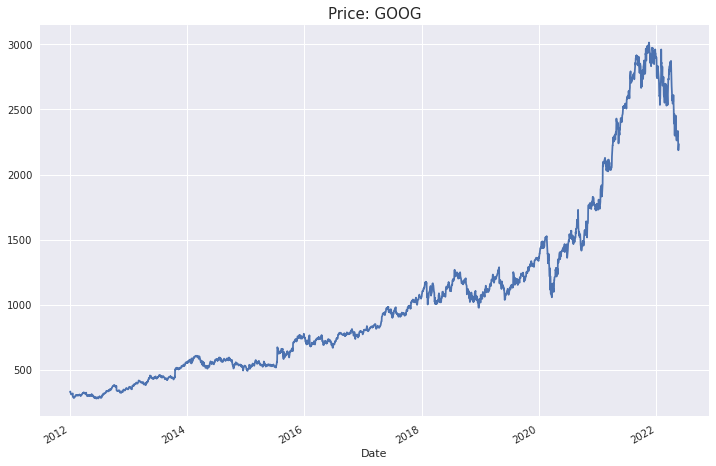

In [146]:
stock.plot_prices()

In [106]:
stock.ticker = 'JNJ'

[*********************100%***********************]  1 of 1 completed


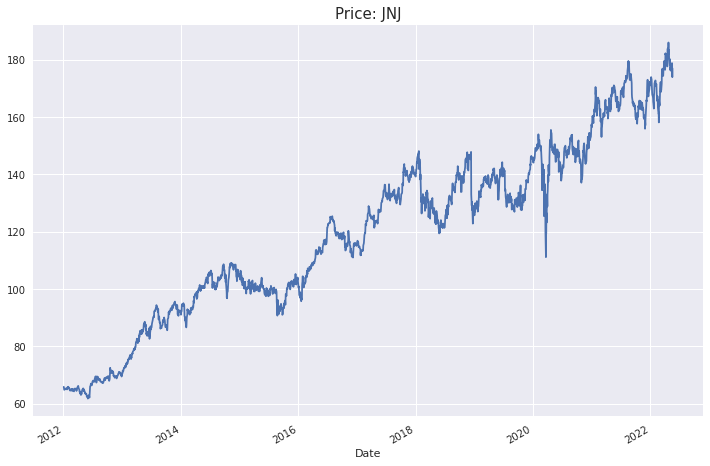

In [107]:
stock.plot_prices()

In [108]:
stock.ticker = '^GSPC'

[*********************100%***********************]  1 of 1 completed


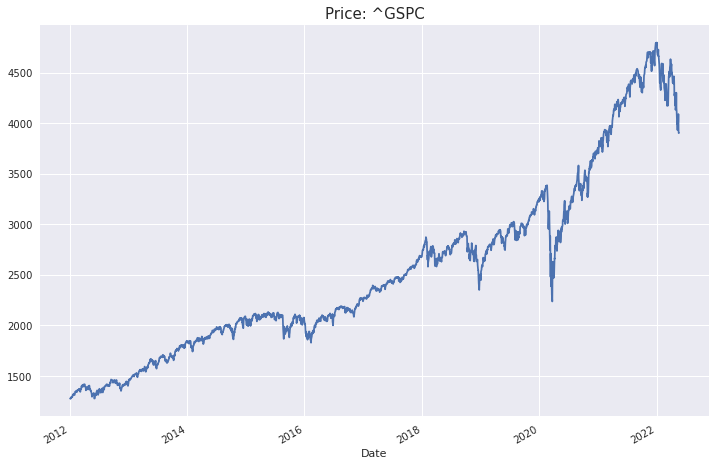

In [109]:
stock.plot_prices()